#Model Setup:#
We divide our agents into three categories based on addiction scores. Red(Score 60-100), Yellow(30-60) and Blue(0-30).   We consider exclusive classes here, i.e. upper limits of a particular class is excluded and included in the next immediate class.  

There are three(or more) stages and each stage has three states- T0 to T2. In T0, the game got newly released and only a few agents are addicted to the game. From T0 to T1(time stamps t0, t1,....,t9) the game reaches many agents, and more and more agents start to become addict to the game. We call it "Growing Phase". From T1 to T2(time stamps t10, t11,...,t19) the game starts to get forgotten as players get bored to using it. We call it "Forgetting Phase"  
  
**Stage 1:** We start with the most simple and basic ABM with 10X10 grid cell, each cell containing one agent (gamer).  
We lay out the ABM Interaction rules for Stage 1:  

(i) The agents are placed in the grid cells, and their scores are updated based on the average scores of their neighbours;  
(ii) The red agents have a higher influence on spreading addiction, i.e we assume that while interacting the score of red agents become twice and influence its impact on neighbouring agents while updating their scores;  
(iii) After each interaction if scores of agents fall below their own type (red, yellow or blue), they change their type and become new coloured agents. Also if their score increases, they might change to new coloured agents as well.  
(iv) In T0, only 10 percent of agents are red agents, i.e intense game addicts(red agents).

(v) With increasing timestamps in T0 to T1, more and more agents become game addicts based on the updated score of their neighbours. Then we finally start to move from T1 to T2, where gradually the game is getting forgotten. We use an exponential decay function of  scores with decay_rate = 0.65


**Model Extension- Stage 2:**  
We extend the model with different Agent attributes(Gender and Age) and advertisement(randomized).   
Age and Gender proportions are based on the paper: Breaking the Stereotype: The Case of Online Gaming (Griffiths, Davies, Chappell)


The Interaction rules are same as Stage 1.

**Model Extension- Stage 3:**  
Throughout stage 1 and 2 we only considered a single game.
Now, we would introduce the idea of multi gaming to understand the concept of impacts of networking. That is agents playing same games even though if are not direct neighbours have higher influence on each other.
The interaction rules are same as Stage 1. We only include the influence of “gamers with same favourite game” on each other. Now while calculating the average score of an agent, we also consider the average score of all agents who have the same favourite game in the grid. We assume equal weights to both of them.  



**Policy Intervention:** We include policies based on existing literature at different time stamps across all the three stages and study their impact.

# Stage One- Without Interventions#

Average score after time 0: 38.343882458847744


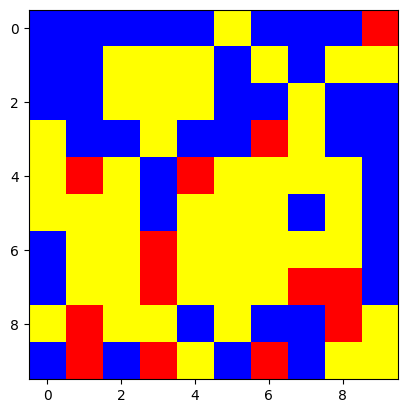

Average score after time 1: 41.349205913732675


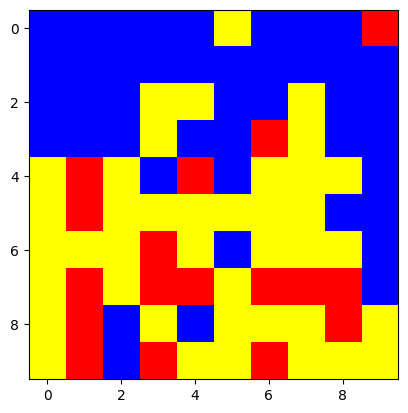

Average score after time 2: 45.35252817194857


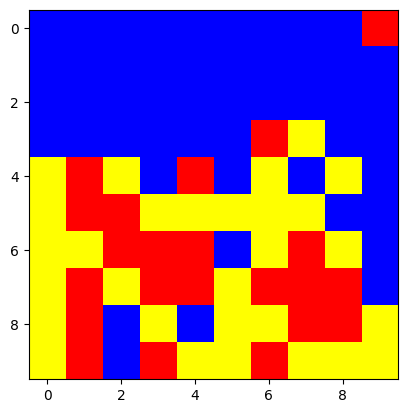

Average score after time 3: 51.958803971000265


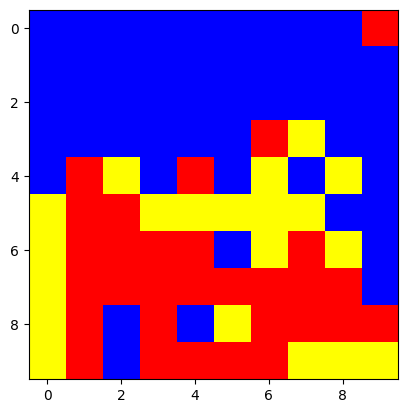

Average score after time 4: 63.40118393477953


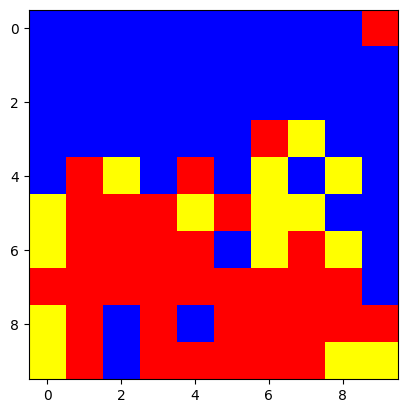

Average score after time 5: 80.98030047211428


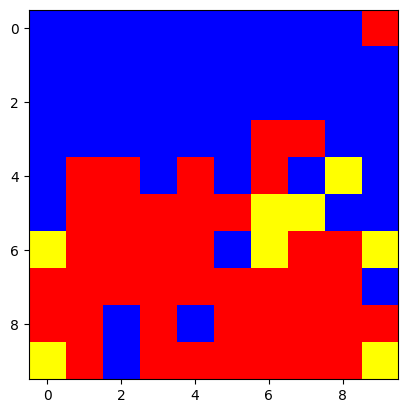

Average score after time 6: 107.31243332245216


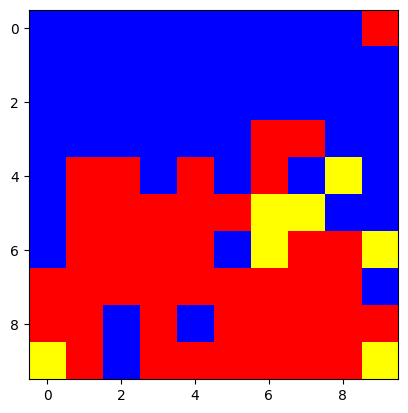

Average score after time 7: 144.30994345502052


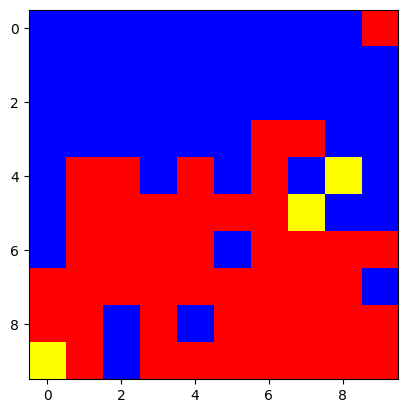

Average score after time 8: 196.5946135760106


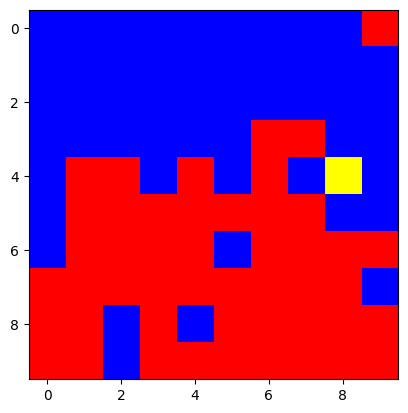

Average score after time 9: 268.8248494877906


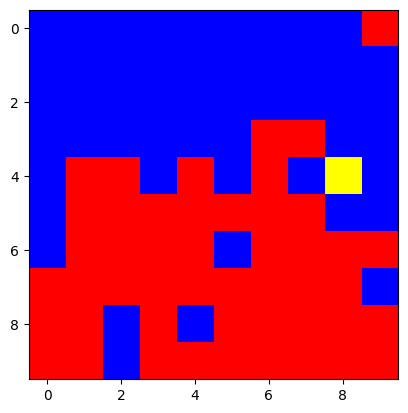

Average score after time 10: 184.5360993002739


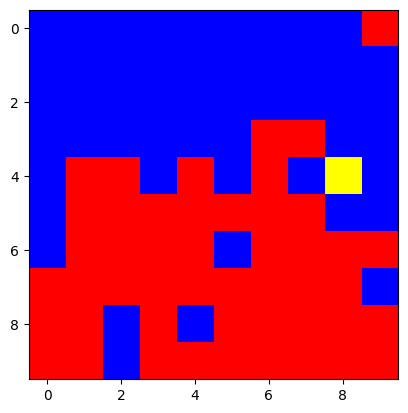

Average score after time 11: 127.03473763262086


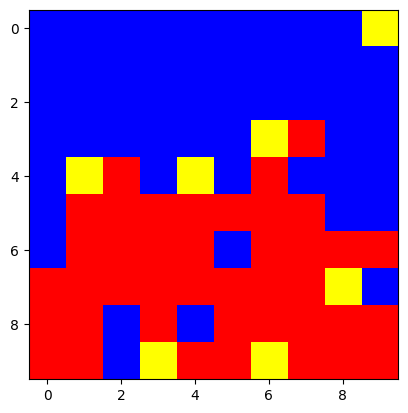

Average score after time 12: 87.59188221626731


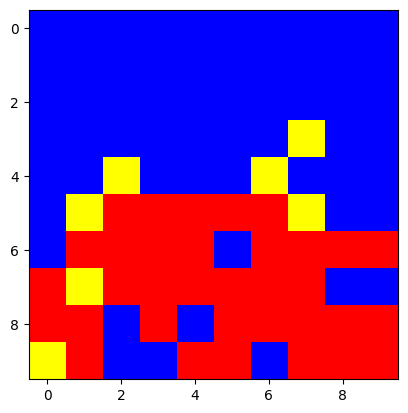

Average score after time 13: 61.17408425501312


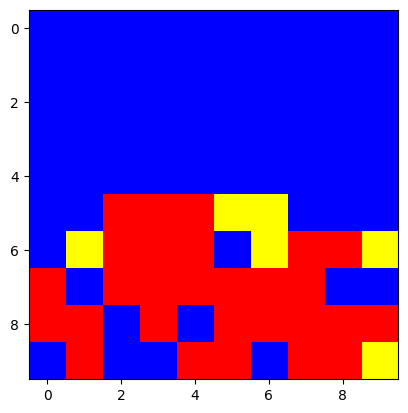

Average score after time 14: 43.49791091456301


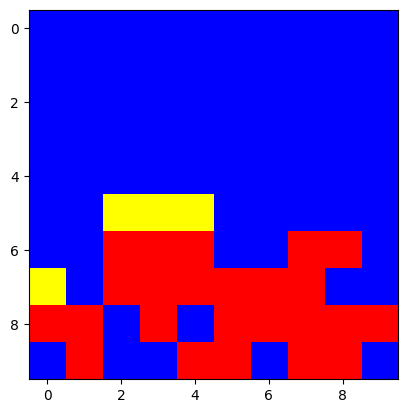

Average score after time 15: 32.090413816266356


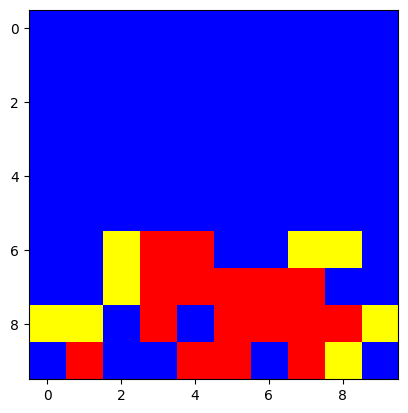

Average score after time 16: 24.47602551205149


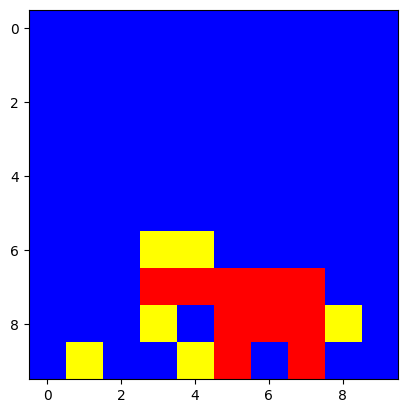

Average score after time 17: 19.389376468031614


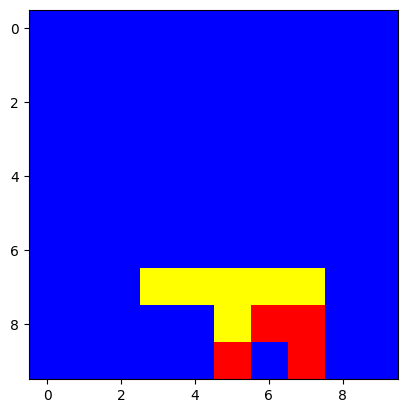

Average score after time 18: 16.053378346335503


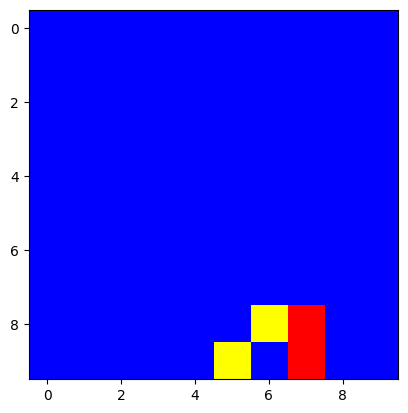

Average score after time 19: 14.405961698437935


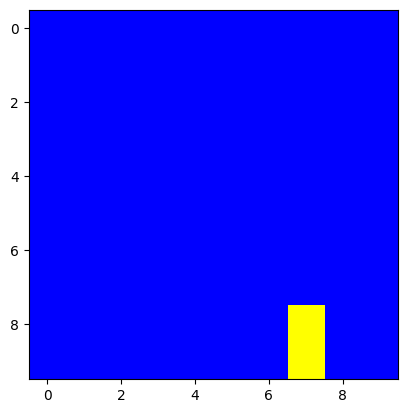

In [ ]:

#Stage 1- Without Interventions

import numpy as np
import matplotlib.pyplot as plt
import random

np.random.seed(65)
random.seed(65)

# We define global variables
num_agents = 100
grid_size = 10
T0_percent_high_scores = 0.13

# Defining agent class
class Agent:
    def __init__(self, score):
        self.score = score
        self.color = self.get_color()

    def get_color(self):
      if self.score >= 60:
        return (1.0, 0.0, 0.0)  # red
      elif self.score >= 30:
        return (1.0, 1.0, 0.0)  # yellow
      else:
        return (0.0, 0.0, 1.0)  # blue

# We initialize agents with scores
agents = []
for i in range(num_agents):
    if i < num_agents * T0_percent_high_scores:
        score = np.random.randint(60, 100)
    else:
        score = np.random.randint(0, 60)
    agents.append(Agent(score))

# Grid environment: Recall Stefania suggested to use 2D Grid
grid = np.zeros((grid_size, grid_size), dtype=object)
for i in range(grid_size):
    for j in range(grid_size):
        index = np.random.randint(num_agents)
        grid[i, j] = agents[index]

t0 = 0
t1 = 10
t2 = 20
for t in range(t2):
    # Computing average score for each agent's neighborhood
    for agent in agents:
        locations = np.argwhere(grid == agent)
        if locations.size == 0:
            continue
        row, col = locations[0]
        neighbors = grid[max(0, row-1):min(grid_size, row+1), max(0, col-1):min(grid_size, col+1)].flatten()
        neighbor_scores = [n.score for n in neighbors if n != agent]
        if neighbor_scores:
            neighbor_avg_score = sum(neighbor_scores) / len(neighbor_scores)
            if agent.score > 60:
                agent.score = (((agent.score * 2) + neighbor_avg_score)) / 2.0
                agent.color = agent.get_color()
            else:
                agent.score = (agent.score + neighbor_avg_score) / 2.0
                agent.color = agent.get_color()

            #decay_rate = 1.1143112  # Decay rate for exponential decay
            #decay_rate = 0.63112     # > 0.55
            decay_rate = 0.651296
            if t > 9:  # meaning we are entering state t2 from t1
                agent.score *= np.exp(-decay_rate)  # decay score immediately after calculation

            agent.color = agent.get_color()

    # We update grid with updated agents
    for agent in agents:
        locations = np.argwhere(grid == agent)
        if locations.size == 0:
            continue
        row, col = locations[0]
        grid[row, col] = agent

    # after the score calculations
    total_score = sum(agent.score for agent in agents)
    average_score = total_score / num_agents
    print(f"Average score after time {t}: {average_score}")

    # Visualization of current state of the grid with colors
    plt.imshow([[agent.color for agent in row] for row in grid], interpolation='nearest')
    plt.show()








**Stage 1 interpretation:** From the output of the code we can visualise that the average score gradually increases in the growing phase (T0 -> T1) as the game is expected to reach more and more agents during this time and more players are getting addicted (i.e the number of red agents are increasing). In the forgetting phase (T1 -> T2), we then notice the gradual decline in the average score due to the implementation of the Exponential decay factor. This emphasizes the idea that the game loses its popularity over time.

# Stage One and Two including interventions

**Hypothesis:** We assume that the interventions work and we reach an "all bluish distribution".

**Actual Outcome:**
We notice that although we reach an all "bluish distribution" on few occasions, in cases where we do not, the average score is reduced in most timestamps.
Average in Stage 2 at many timestamps specially in the beginning(i.e without exp decay implementation) might increase after introducing interventions, signifying that while the game is gaining its popularity(i.e in phase T0->T1), the existing interventions are not "strong" enough.But the average score rarely increases at later timestamps where we have exp_decay factor included.

Average score after time 0: 43.90847561554067
Average score after including intervention(s) at time 0: 40.26239313125756
Average score after time 1: 46.224386884859065
Average score after including intervention(s) at time 1: 44.404630655922176
Average score after time 2: 55.98286472523504
Average score after including intervention(s) at time 2: 59.573543462978165
Average score after time 3: 83.30604365277206
Average score after including intervention(s) at time 3: 96.65669012478091
Average score after time 4: 145.246325521892
Average score after including intervention(s) at time 4: 170.0288852864113
Average score after time 5: 257.1444462843012
Average score after including intervention(s) at time 5: 294.60337115029864
Average score after time 6: 438.5769646034819
Average score after including intervention(s) at time 6: 487.6710041905333
Average score after time 7: 710.7025276343531
Average score after including intervention(s) at time 7: 769.2976979932151
Average score after time 8: 1

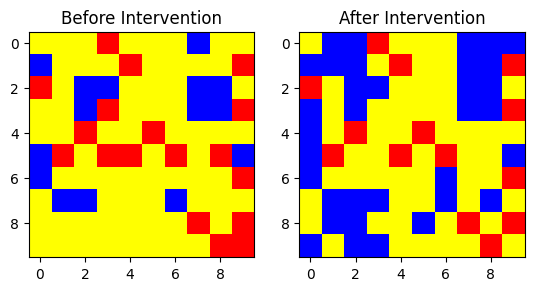

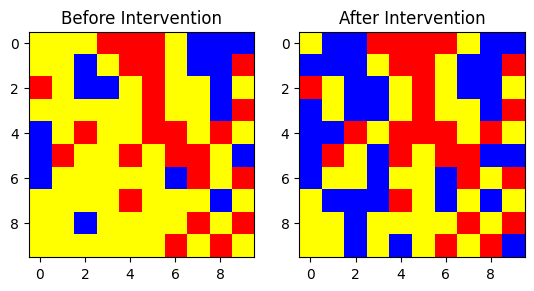

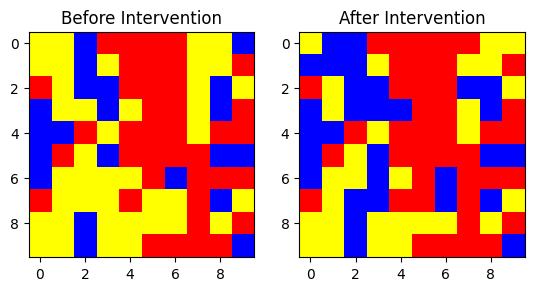

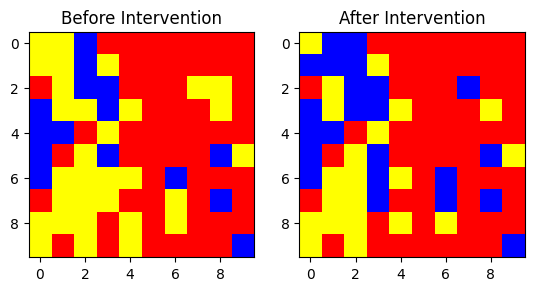

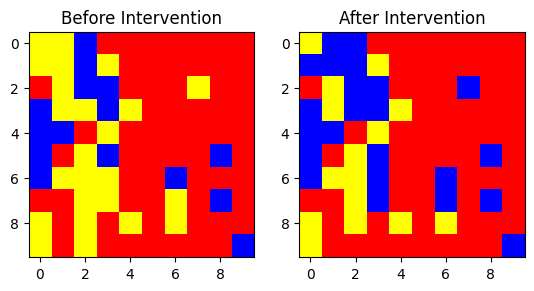

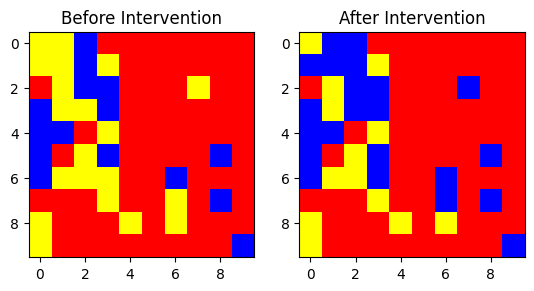

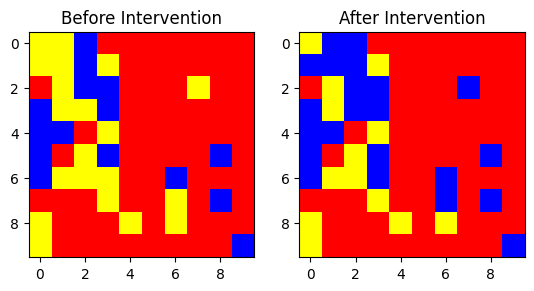

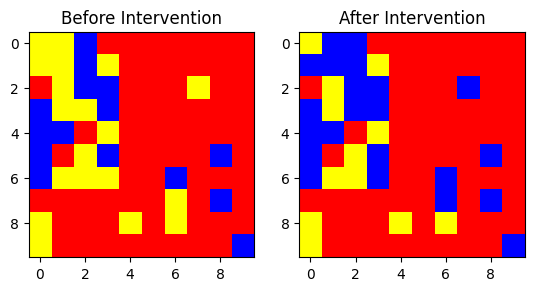

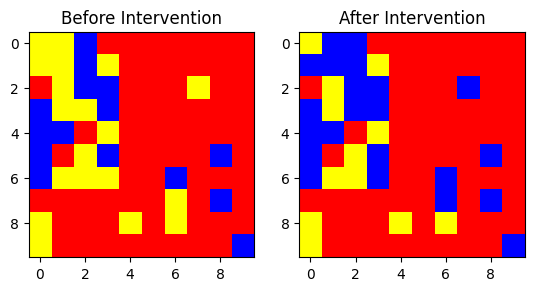

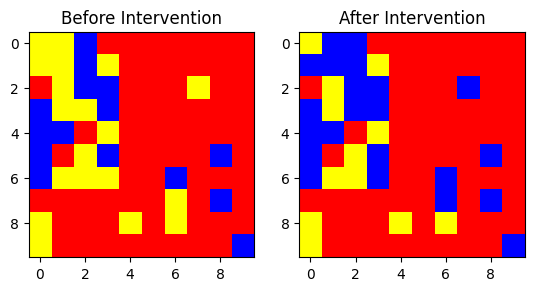

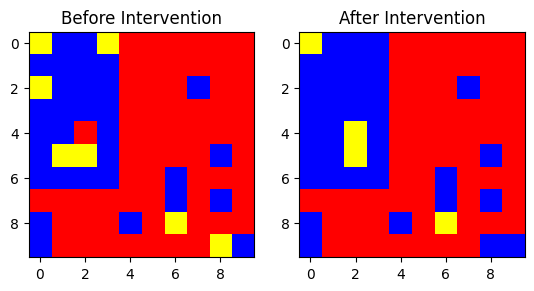

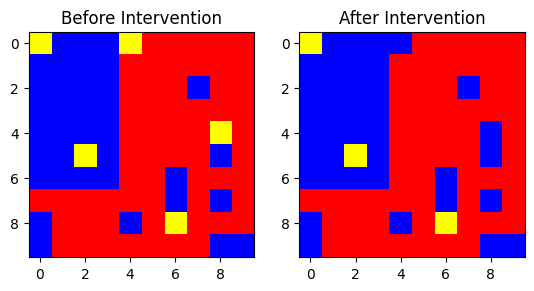

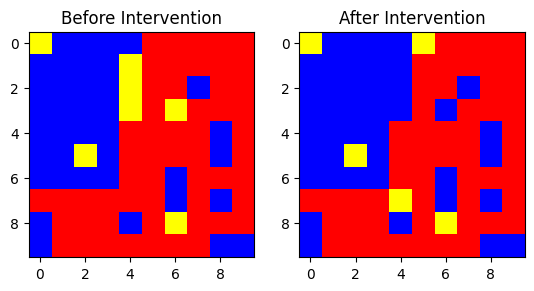

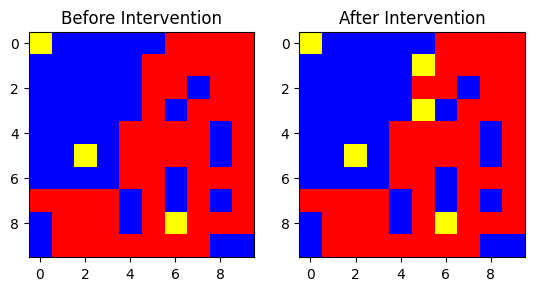

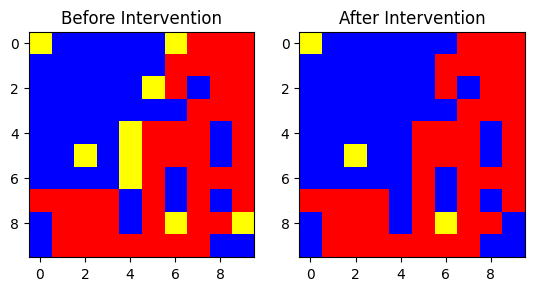

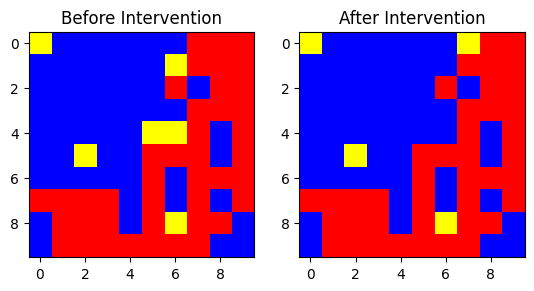

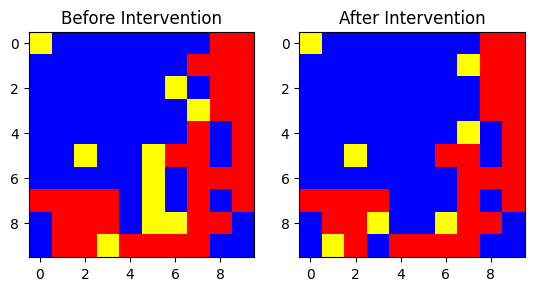

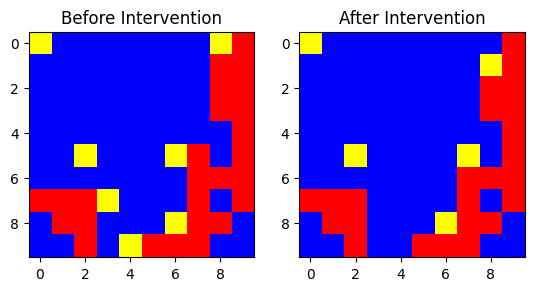

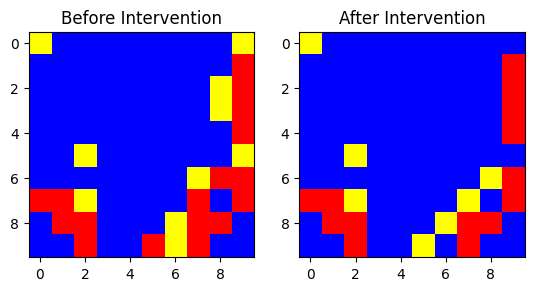

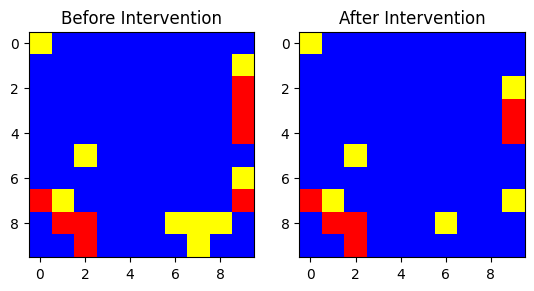

In [ ]:
#Stage One and Stage Two including interventions

import numpy as np
import matplotlib.pyplot as plt
import random
from collections import defaultdict

np.random.seed(43)
random.seed(43)

# We define global variables
num_agents = 100
grid_size = 10
T0_percent_high_scores = 0.13
male_percentage = 0.85

# Defining agent class
class Agent:
    def __init__(self, score, gender, age, advertisement_exposure):
        self.score = score
        self.gender = gender
        self.age = age
        self.advertisement_exposure = advertisement_exposure
        self.color = self.get_color()

    def __str__(self):
        return f"Agent(score={self.score}, gender={self.gender}, age={self.age}, advertisement_exposure={self.advertisement_exposure})"

    def get_color(self):
      if self.score >= 60:
        return (1.0, 0.0, 0.0)  # red
      elif self.score >= 30:
        return (1.0, 1.0, 0.0)  # yellow
      else:
        return (0.0, 0.0, 1.0)  # blue

# Age ranges and their corresponding percentages
age_ranges = [
    (0, 14, 0.09),
    (14, 19, 0.31),
    (19, 24, 0.21),
    (24, 30, 0.20),
    (30, 40, 0.13),
    (40, 60, 0.03),
    (60, 100, 0.03)
]

# First, we generate a list of ages according to the specified distribution:
age_list = []
for age_range in age_ranges:
    start, end, proportion = age_range
    num_in_range = int(proportion * num_agents)
    ages_in_range = np.random.randint(start, end, num_in_range)
    age_list.extend(ages_in_range)

# Then we ensure the list has the right size:
if len(age_list) < num_agents:
    age_list.extend(np.random.randint(0, 100, num_agents - len(age_list)))

t0 = 0
t1 = 10
t2 = 20
#decay_rate = 0.01143112  # Decay rate for exponential decay

attention_switching_effect_low = 0.11
attention_switching_effect_high = 0.19
Rationalization_Education_effect_low=0.17
Rationalization_Education_effect_high =0.02
Parental_Monitoring_effect_low=0.02
Parental_Monitoring_effect_high=0.10
Perceived_Cost_effect_low=0.13
Perceived_Cost_effect_high=0.02

# Advertisement impact on addiction score
advertisement_impact = 0.1
import random
# Initializing agents with scores, gender, age, and advertisement exposure
agents = []
for i in range(num_agents):
    if i < num_agents * T0_percent_high_scores:
        score = np.random.randint(60, 100)
    else:
        score = np.random.randint(0, 60)

    if i < num_agents * male_percentage:
        gender = 'Male'
    else:
        gender = 'Female'

    # Selecting age based on the provided age ranges and percentages
    age = age_list.pop(np.random.randint(len(age_list))) # Randomly selecting

    advertisement_exposure = np.random.rand()  # Generating a random value for advertisement exposure

    # Adjusting the agent's addiction score based on advertisement exposure
    score += advertisement_exposure * advertisement_impact
    score = max(0, min(score, 100))
    agents.append(Agent(score, gender, age, advertisement_exposure))

# Grid environment: Recall Stefania suggested to use 2D Grid
grid = np.zeros((grid_size, grid_size), dtype=object)
for i in range(grid_size):
    for j in range(grid_size):
        index = np.random.randint(num_agents)
        grid[i, j] = agents[index]

for t in range(t2):
    # average score calculation for each agent's neighborhood
    for agent in agents:
        locations = np.argwhere(grid == agent)
        if locations.size == 0:
            continue
        row, col = locations[0]
        neighbors = grid[max(0, row-1):min(grid_size, row+1), max(0, col-1):min(grid_size, col+1)].flatten()
        neighbor_scores = [n.score for n in neighbors if n != agent]
        if neighbor_scores:
            neighbor_avg_score = sum(neighbor_scores) / len(neighbor_scores)
            if agent.score > 60:
                agent.score = (((agent.score * 2) + neighbor_avg_score)) / 2.0
                agent.color = agent.get_color()
            else:
                agent.score = (agent.score + neighbor_avg_score) / 2.0
                agent.color = agent.get_color()

            #decay_rate = 0.653112  # Decay rate for exponential decay
            decay_rate = 0.653112
            if t > 9:  # meaning we are entering state t2 from t1
                agent.score *= np.exp(-decay_rate)  # decay score immediately after calculation

            agent.color = agent.get_color()

    # We update grid with updated agents
    for agent in agents:
        locations = np.argwhere(grid == agent)
        if locations.size == 0:
            continue
        row, col = locations[0]
        grid[row, col] = agent

    # after the score calculations
    total_score = sum(agent.score for agent in agents)
    average_score = total_score / num_agents
    print(f"Average score after time {t}: {average_score}")

    fig, axs = plt.subplots(1, 2)
    axs[0].imshow([[agent.color for agent in row] for row in grid], interpolation='nearest')
    axs[0].set_title('Before Intervention')

    for agent in agents:
        locations = np.argwhere(grid == agent)
        if locations.size == 0:
            continue
        row, col = locations[0]
        neighbors = grid[max(0, row-1):min(grid_size, row+1), max(0, col-1):min(grid_size, col+1)].flatten()
        neighbor_scores = [n.score for n in neighbors if n != agent]
        if neighbor_scores:
            neighbor_avg_score = sum(neighbor_scores) / len(neighbor_scores)
            if agent.score > 60:
                agent.score *= (1 - attention_switching_effect_high)
                agent.score *= (1 - Rationalization_Education_effect_high)
                agent.score *= (1 - Parental_Monitoring_effect_high)
                agent.score *= (1 - Perceived_Cost_effect_high)
                agent.score = (agent.score * 2 + neighbor_avg_score) / 2.0
                agent.color = agent.get_color()
            else:
                agent.score *= (1 - attention_switching_effect_low)
                agent.score *= (1 - Rationalization_Education_effect_low)
                agent.score *= (1 - Parental_Monitoring_effect_low)
                agent.score *= (1 - Perceived_Cost_effect_low)
                agent.score = (agent.score + neighbor_avg_score) / 2.0
                agent.color = agent.get_color()

    axs[1].imshow([[agent.get_color() for agent in row] for row in grid], interpolation='nearest')
    axs[1].set_title('After Intervention')

    # after the score calculations
    total_score = sum(agent.score for agent in agents)
    average_score = total_score / num_agents
    print(f"Average score after including intervention(s) at time {t}: {average_score}")



#Stage Three (Newtorking- Concept of Multiple Games)
Throughout stage 1 and 2 we only considered a single game.
Now, we would introduce the idea of multi gaming to understand the concept of the impact of networking. That is agents playing same games even though if are not direct neighbours have higher influence on each other. Favorite Game- Agents were assigned one of the three games, modeling their primary game of interest.

We now also include the influence of “gamers with same favourite game” on each other. While updating the score of an agent, we also consider the average score of all agents who have the same favourite game in the grid along with the average score of their direct neighbours and assume equal weights to both of them.

One Important Assumption for Stage Three is within the grid all players with the same favourite game know each other.

**Hypothesis and Actual Outcome for stage 3:**

We hypothesize that since we now have an extra factor affecting the influence of gaming addiction in a positive way, our current interventions in the model are not "strong" enough to reduce the overall addiction.

The actual outcome matches (in most cases) with our hypothesis and thus we have an "all red distribution" and the interventions can no longer reduce the addiction level.

However, if we significantly increase the exponential decay rate, we would find that scores are reducing and we no longer would have an "all red distribution".

One Caveat is the distance between agents with same favourite game in the grid doesn't matter. We assume the influence between the players with same favourite game is based solely on shared interest, i.e the game, and not on physical proximity. This sounds logical in the way in the age of digital communication, physical distance is often irrelevant when it comes to social influence. Online communities and networks can form around shared interests, like a favorite video game, without the members ever being in physical proximity.

Average score after time 0: 77.7009910243168
Average score after including intervention(s) at time 0: 77.99561200832648
Average score after time 1: 87.12954799053729
Average score after including intervention(s) at time 1: 91.00263696899852
Average score after time 2: 107.29454770943364
Average score after including intervention(s) at time 2: 120.13170860564172
Average score after time 3: 150.90580524638358
Average score after including intervention(s) at time 3: 179.81601671528756
Average score after time 4: 235.91768300852337
Average score after including intervention(s) at time 4: 286.6335516549506
Average score after time 5: 381.6758503447781
Average score after including intervention(s) at time 5: 464.18733674327393
Average score after time 6: 621.451227199313
Average score after including intervention(s) at time 6: 750.2494757815351
Average score after time 7: 1005.1300631364522
Average score after including intervention(s) at time 7: 1200.490517131334
Average score after time 8:

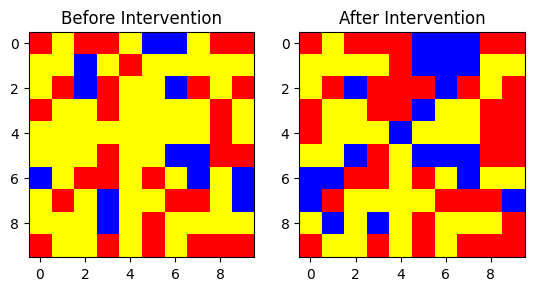

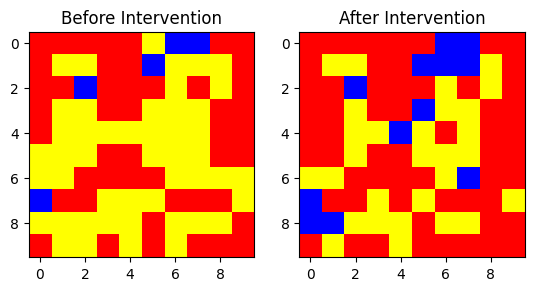

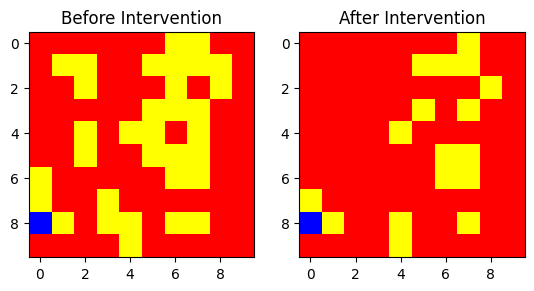

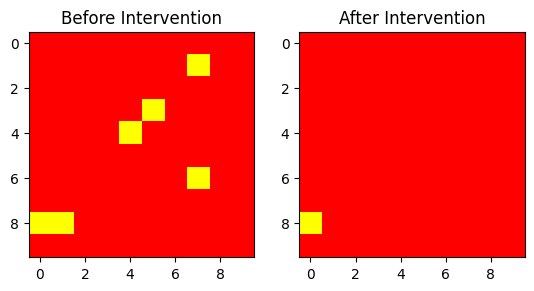

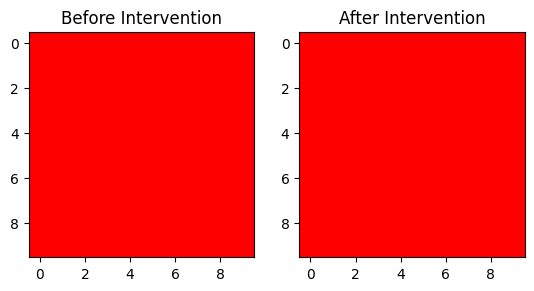

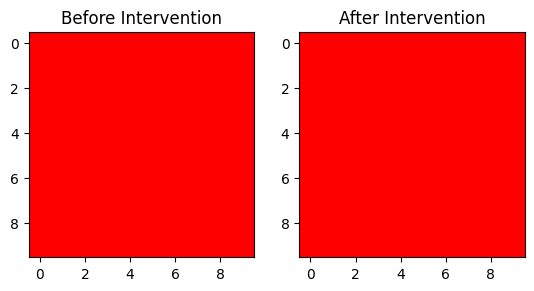

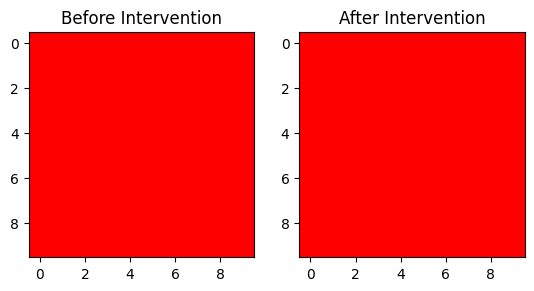

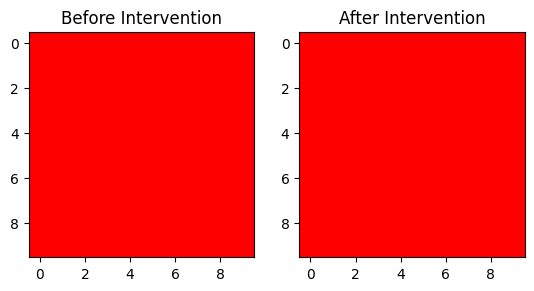

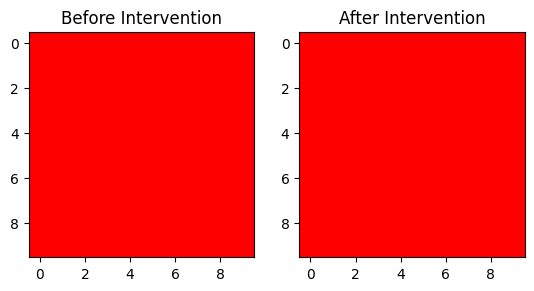

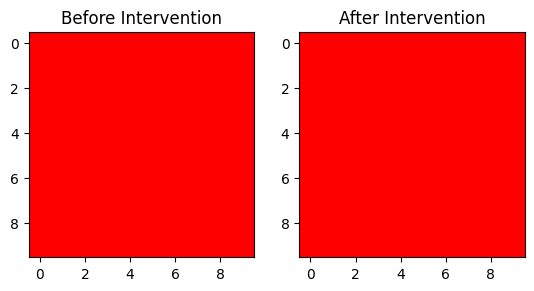

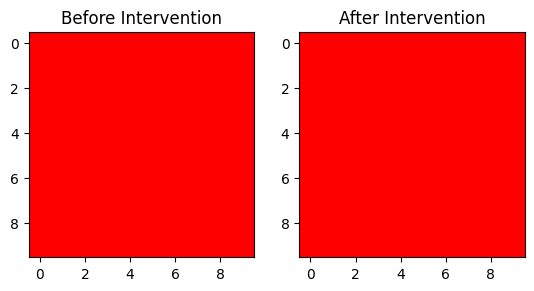

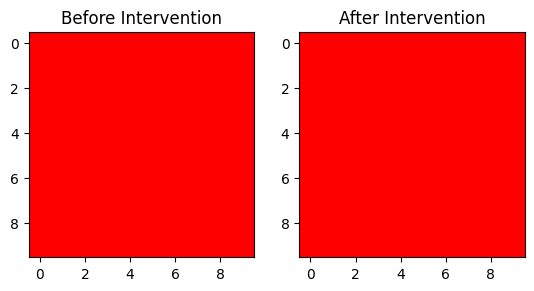

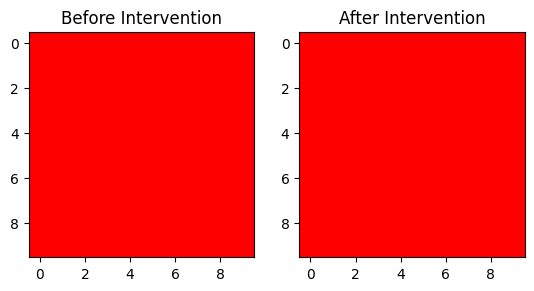

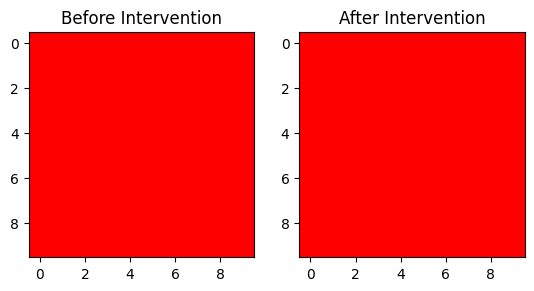

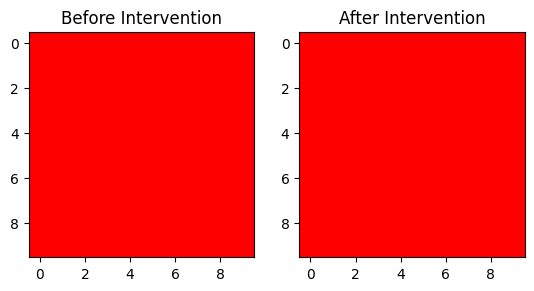

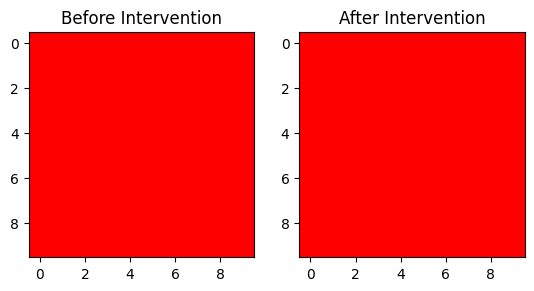

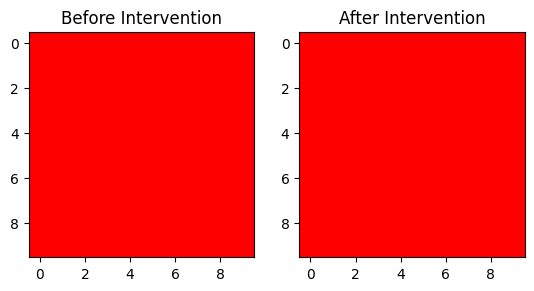

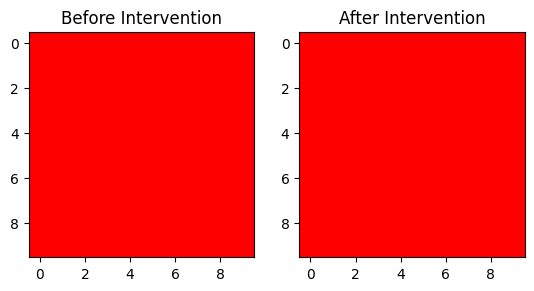

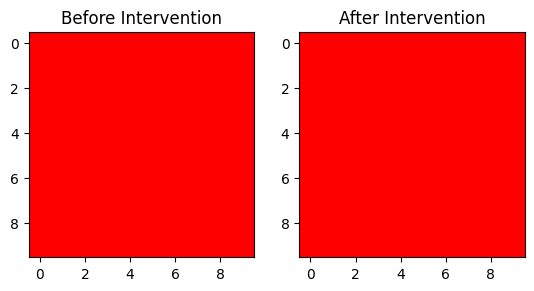

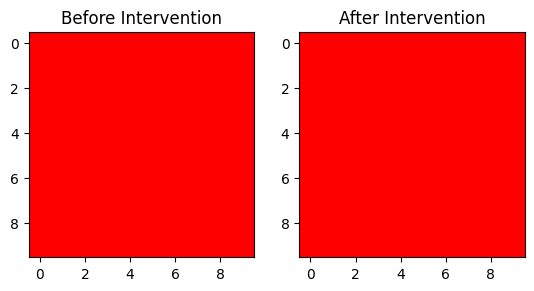

In [ ]:
#Stage Three (Networking- Concept of Multiple Games):

import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
import random

np.random.seed(48)
random.seed(48)

# We define global variables
num_agents = 100
grid_size = 10
T0_percent_high_scores = 0.13
male_percentage = 0.85

# Defining agent class
class Agent:
    def __init__(self, score, gender, age, advertisement_exposure, favorite_game):
        self.score = score
        self.gender = gender
        self.age = age
        self.advertisement_exposure = advertisement_exposure
        self.color = self.get_color()
        self.favorite_game = favorite_game  # new attribute

    def __str__(self):
        return f"Agent(score={self.score}, gender={self.gender}, age={self.age}, advertisement_exposure={self.advertisement_exposure}, favorite_game={self.favorite_game})"

    def get_color(self):
      if self.score >= 60:
        return (1.0, 0.0, 0.0)  # red
      elif self.score >= 30:
        return (1.0, 1.0, 0.0)  # yellow
      else:
        return (0.0, 0.0, 1.0)  # blue

# Age ranges and their corresponding percentages
age_ranges = [
    (0, 14, 0.09),
    (14, 19, 0.31),
    (19, 24, 0.21),
    (24, 30, 0.20),
    (30, 40, 0.13),
    (40, 60, 0.03),
    (60, 100, 0.03)
]

# First, we generate a list of ages according to the specified distribution:
age_list = []
for age_range in age_ranges:
    start, end, proportion = age_range
    num_in_range = int(proportion * num_agents)
    ages_in_range = np.random.randint(start, end, num_in_range)
    age_list.extend(ages_in_range)

# Then we ensure the list has the right size:
if len(age_list) < num_agents:
    age_list.extend(np.random.randint(0, 100, num_agents - len(age_list)))

t0 = 0
t1 = 10
t2 = 20
#decay_rate = 0.01143112  # Decay rate for exponential decay

attention_switching_effect_low = 0.11
attention_switching_effect_high = 0.19
Rationalization_Education_effect_low=0.17
Rationalization_Education_effect_high =0.02
Parental_Monitoring_effect_low=0.02
Parental_Monitoring_effect_high=0.10
Perceived_Cost_effect_low=0.13
Perceived_Cost_effect_high=0.02

# Advertisement impact on addiction score
advertisement_impact = 0.1
import random
# Initializing agents with scores, gender, age, and advertisement exposure and favourite game
agents = []
games = ['game1', 'game2', 'game3']
game_agents = defaultdict(list)

for i in range(num_agents):
    #score
    if i < num_agents * T0_percent_high_scores:
        score = np.random.randint(60, 100)
    else:
        score = np.random.randint(0, 60)
    #age
    if i < num_agents * male_percentage:
        gender = 'Male'
    else:
        gender = 'Female'

    #favourite game
    favorite_game = np.random.choice(games)
    agent = Agent(score, gender, age, advertisement_exposure, favorite_game)
    agents.append(agent)
    game_agents[favorite_game].append(agent)

    # Selecting age based on the provided age ranges and percentages
    age = age_list.pop(np.random.randint(len(age_list))) # Randomly selecting

    advertisement_exposure = np.random.rand()  # Generating a random value for advertisement exposure

    # Adjusting the agent's addiction score based on advertisement exposure
    score += advertisement_exposure * advertisement_impact
    score = max(0, min(score, 100))
    agents.append(Agent(score, gender, age, advertisement_exposure, favorite_game))

# Grid environment: Recall Stefania suggested to use 2D Grid
grid = np.zeros((grid_size, grid_size), dtype=object)
for i in range(grid_size):
    for j in range(grid_size):
        index = np.random.randint(num_agents)
        grid[i, j] = agents[index]

for t in range(t2):
    # Average score calculation for each agent's neighborhood
    for agent in agents:
        locations = np.argwhere(grid == agent)
        if locations.size == 0:
            continue
        row, col = locations[0]
        neighbors = grid[max(0, row-1):min(grid_size, row+1), max(0, col-1):min(grid_size, col+1)].flatten()
        neighbor_scores = [n.score for n in neighbors if n != agent]

        same_game_agents = game_agents[agent.favorite_game]
        same_game_scores = [a.score for a in same_game_agents if a != agent]
        same_game_avg_score = sum(same_game_scores) / len(same_game_scores) if same_game_scores else 0

        #This is a Strong Assumption

        if neighbor_scores:
            neighbor_avg_score = sum(neighbor_scores) / len(neighbor_scores)
            neighbor_avg_score = (neighbor_avg_score + same_game_avg_score) / 2    # giving equal weight to immediate neighbours' impact and agents with same favourite game impact
            if agent.score > 60:
                agent.score = (((agent.score * 2) + neighbor_avg_score)) / 2.0
                agent.color = agent.get_color()
            else:
                agent.score = (agent.score + neighbor_avg_score) / 2.0
                agent.color = agent.get_color()

            #decay_rate = 1.653112  # Need an increase in Decay rate to create an impact
            #decay_rate = 0.653112  # Decay rate for exponential decay
            decay_rate = 0.651296
            if t > 9:  # meaning we are entering state t2 from t1
                agent.score *= np.exp(-decay_rate)

            agent.color = agent.get_color()

    # We update grid with updated agents
    for agent in agents:
        locations = np.argwhere(grid == agent)
        if locations.size == 0:
            continue
        row, col = locations[0]
        grid[row, col] = agent

    # after the score calculations
    total_score = sum(agent.score for agent in agents)
    average_score = total_score / num_agents
    print(f"Average score after time {t}: {average_score}")

    fig, axs = plt.subplots(1, 2)
    axs[0].imshow([[agent.color for agent in row] for row in grid], interpolation='nearest')
    axs[0].set_title('Before Intervention')

    for agent in agents:
        locations = np.argwhere(grid == agent)
        if locations.size == 0:
            continue
        row, col = locations[0]
        neighbors = grid[max(0, row-1):min(grid_size, row+1), max(0, col-1):min(grid_size, col+1)].flatten()
        neighbor_scores = [n.score for n in neighbors if n != agent]
        if neighbor_scores:
            neighbor_avg_score = sum(neighbor_scores) / len(neighbor_scores)
            if agent.score > 60:
                agent.score *= (1 - attention_switching_effect_high)
                agent.score *= (1 - Rationalization_Education_effect_high)
                agent.score *= (1 - Parental_Monitoring_effect_high)
                agent.score *= (1 - Perceived_Cost_effect_high)
                agent.score = (agent.score * 2 + neighbor_avg_score) / 2.0
                agent.color = agent.get_color()
            else:
                agent.score *= (1 - attention_switching_effect_low)
                agent.score *= (1 - Rationalization_Education_effect_low)
                agent.score *= (1 - Parental_Monitoring_effect_low)
                agent.score *= (1 - Perceived_Cost_effect_low)
                agent.score = (agent.score + neighbor_avg_score) / 2.0
                agent.color = agent.get_color()

    axs[1].imshow([[agent.get_color() for agent in row] for row in grid], interpolation='nearest')
    axs[1].set_title('After Intervention')

    # after the score calculations
    total_score = sum(agent.score for agent in agents)
    average_score = total_score / num_agents
    print(f"Average score after including intervention(s) at time {t}: {average_score}")



# Conclusions(till now):
In stage 3 although in most cases we reach red distribution. To make it reddish every time, we can argue that for online gaming, networking should be given more weight compared neighbouring agents.

**We conclude we need more interventions so that addiction reduction is robust over time.**
